# MLOps con MLflow

#### Get data

In [18]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


#### Preprocessing

In [19]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'Price', 
          transform_target = True, 
          log_experiment = True, 
          #log_plots = True,
          experiment_name = 'diamond',
         silent = True)

,Description,Value
0,session_id,6117
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 28)"


#### Model Training

In [20]:
# compare all models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,583.1792,1572257.8805,1203.4284,0.9854,0.0626,0.0455,1.4500
lightgbm,Light Gradient Boosting Machine,639.0446,1718817.5795,1293.6441,0.9837,0.0676,0.0494,0.0900
xgboost,Extreme Gradient Boosting,666.1355,1806150.4430,1313.5242,0.9831,0.0705,0.0519,0.4380
rf,Random Forest Regressor,729.8493,2172902.8158,1451.2369,0.9796,0.0786,0.0575,0.6350
et,Extra Trees Regressor,748.6452,2310467.8998,1492.9390,0.9783,0.0812,0.0595,0.7670
gbr,Gradient Boosting Regressor,745.5790,2378693.4943,1507.3992,0.9776,0.0765,0.0570,0.2390
dt,Decision Tree Regressor,914.1916,3060766.6992,1734.6155,0.9709,0.1031,0.0743,0.0290
ada,AdaBoost Regressor,2012.0410,17687253.1452,4155.6194,0.8331,0.1921,0.1529,0.2210
knn,K Neighbors Regressor,3045.7705,34588417.9974,5856.0088,0.6657,0.3598,0.2329,0.0770
omp,Orthogonal Matching Pursuit,3361.2422,90478910.9457,9414.8907,0.1149,0.2830,0.2224,0.0190


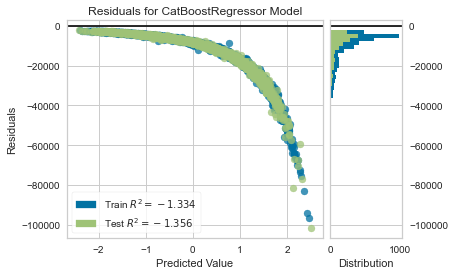

In [21]:
# check the residuals of trained model
plot_model(best, plot = 'residuals')

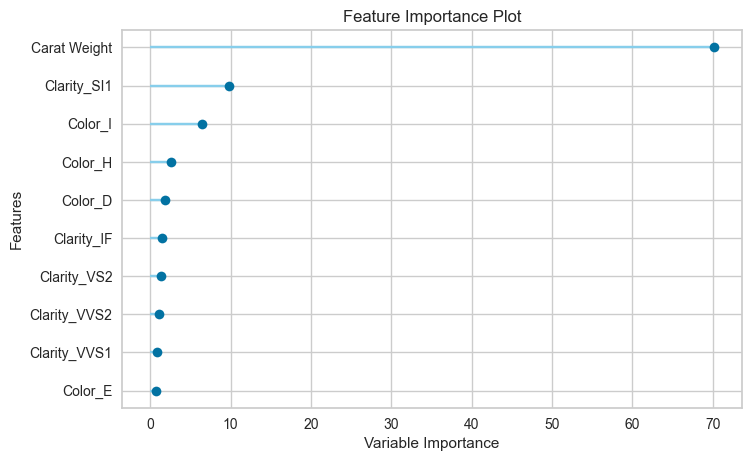

In [22]:
# check feature importance
plot_model(best, plot = 'feature')

In [23]:
# finalize the model
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy=...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  PowerTransformedTargetRegressor(border_count=254,
                                                  loss_function

### Model management with MLFlow

In [7]:
# within notebook (notice ! sign infront)
!mlflow ui


^C


In [8]:
#localhost:5000

### Consume the model

In [25]:
import mlflow
logged_model = 'runs:/8996b5cec1324f00a1b721a3d5b51c59/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(data))

array([ 5342.64944794,  3522.9785068 ,  3361.54066621, ...,
        6240.76579861, 11354.07834169, 35877.59382132])

In [26]:
# print pipeline
print(loaded_model)

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 8996b5cec1324f00a1b721a3d5b51c59



In [13]:
pipeline = load_model('C:/Users/Leyre/Desktop/Curso Mondragon/Curso_ML con Pycaret/Entrega/5. MLOps/mlruns/1/23c33b7efc8341ee823759c7c41b2293/artifacts/model/model')

Transformation Pipeline and Model Successfully Loaded


In [14]:
# print pipeline
print(pipeline)

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 PowerTransformedTargetRegressor(border_count=254,
                                                 loss_function='RMSE',
        

In [15]:
data = get_data('diamond')

# create a copy of data and drop Price
data2 = data.copy()
data2.drop('Price', axis=1, inplace=True)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [16]:
# generate predictions
from pycaret.regression import predict_model
predictions = predict_model(pipeline, data=data2)
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5371.536415
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3533.855730
2,0.85,Ideal,H,SI1,EX,EX,GIA,3361.721791
3,0.91,Ideal,E,SI1,VG,VG,GIA,4467.595274
4,0.83,Ideal,G,SI1,EX,EX,GIA,3318.735748
